In [40]:
#from google.colab import drive
#drive.mount('/content/drive')

#root = '/content/drive/MyDrive/projects Data Science/MOA/modeling customer personality/'

In [1]:
# module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

## 1. Dataset

### 1.1. Input Dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep ='\t')

### 1.2 Table Summary

In [44]:
print('Marketing campaign :', df.shape[0], "rows and", df.shape[1],'columns')

Marketing campaign : 2240 rows and 29 columns


In [45]:
### 1.3 Table Setting

In [6]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

## 2. Data Understanding

### 2.1 Check Data

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [48]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Mempunyai kolom 29 kolom yang kolom mayoritas nya kolom int. 

In [49]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [51]:
# Cek Missing Data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,Income,24,1.1
1,ID,0,0.0
2,NumDealsPurchases,0,0.0
3,Z_Revenue,0,0.0
4,Z_CostContact,0,0.0
5,Complain,0,0.0
6,AcceptedCmp2,0,0.0
7,AcceptedCmp1,0,0.0
8,AcceptedCmp5,0,0.0
9,AcceptedCmp4,0,0.0


In [3]:
df['Dt_Customer']= df['Dt_Customer'].apply(pd.to_datetime)

/tmp/ipykernel_9288/2551578159.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer']= df['Dt_Customer'].apply(pd.to_datetime)


mengubah kolom Dt_Customer yang tadinya berbentuk object menjadi datetime

In [4]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [5]:
df['Age'] = 2023 - df['Year_Birth']

In [6]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,56
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,52
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,38
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,49
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,73


### 2.2 EDA

In [23]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69


In [57]:
app_target = pd.DataFrame(df.groupby('Response').size(), columns=['Count'])
app_target = app_target.sort_values(by=['Count'], ascending=False)
app_target = app_target.reset_index().rename(columns={'index': 'TARGET'})
app_target

,Response,Count
0,0,1906
1,1,334


<Axes: ylabel='count'>

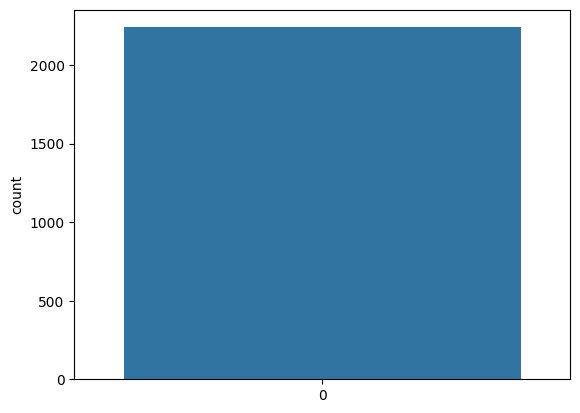

In [7]:
sns.countplot(df['Response'])

In [11]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [12]:
fig = px.pie(df, names='Response',)
fig.write_html('Response_counts.html', auto_open=True)

In [13]:
fig = px.histogram(df, x="Age", color="Response", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.write_html('first_figure.html', auto_open=True)

In [61]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [18]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


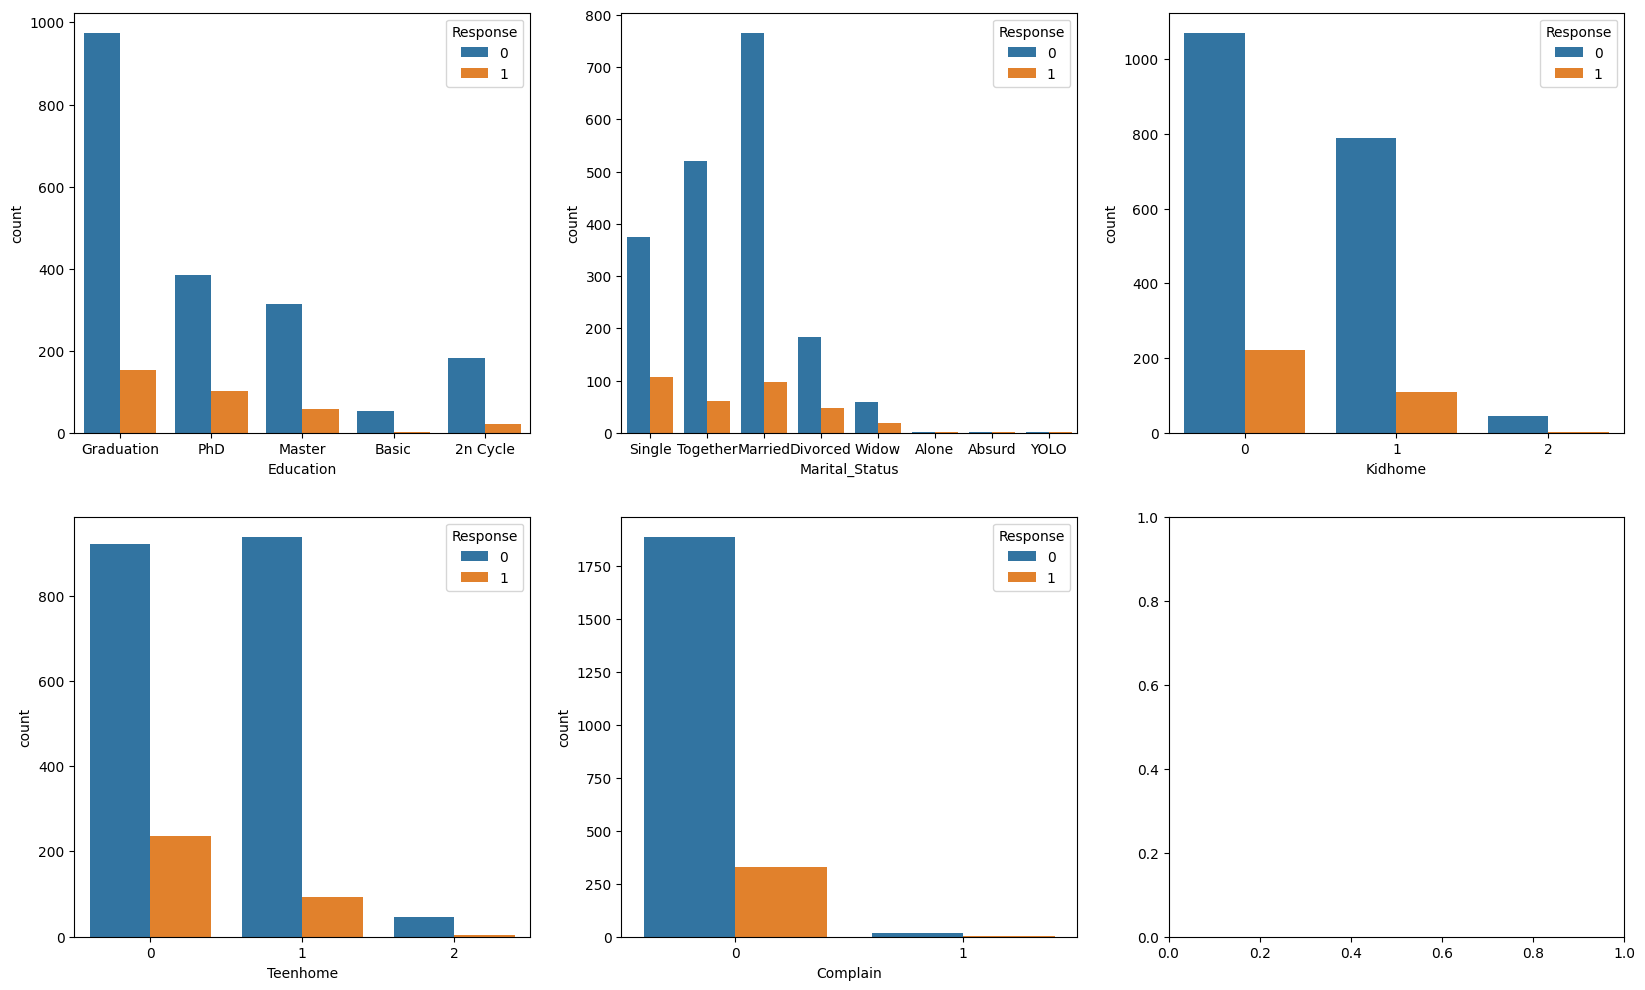

In [63]:

def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='Education', hue='Response',data=df)
    sns.countplot(ax = axes[0,1], x='Marital_Status', hue='Response',data=df)
    sns.countplot(ax = axes[0,2], x='Kidhome', hue='Response',data=df)
    sns.countplot(ax = axes[1,0], x='Teenhome', hue='Response',data=df)
    sns.countplot(ax = axes[1,1], x='Complain', hue='Response',data=df)
plot_categorical_data()

Pada grafik diatas saya menyimpulkan :


*   pada kolom education banyak orang yang mengikuti itu ada di orang - orang yang memiliki pendidikan sarjana, sedangkan yang paling rendah itu ada pada basic berarti dari situ kemungkinan kita kurang dalam bahaanya kurang dimengerti atau kita bisa dijelaskan dengan lebih mudah dimengerti.
*   pada kolom together banyak orang yang mengikuti itu orang - orang yang single, harus nya dengan status together juga bisa menyimbangi married dan 


*   List item
*   List item





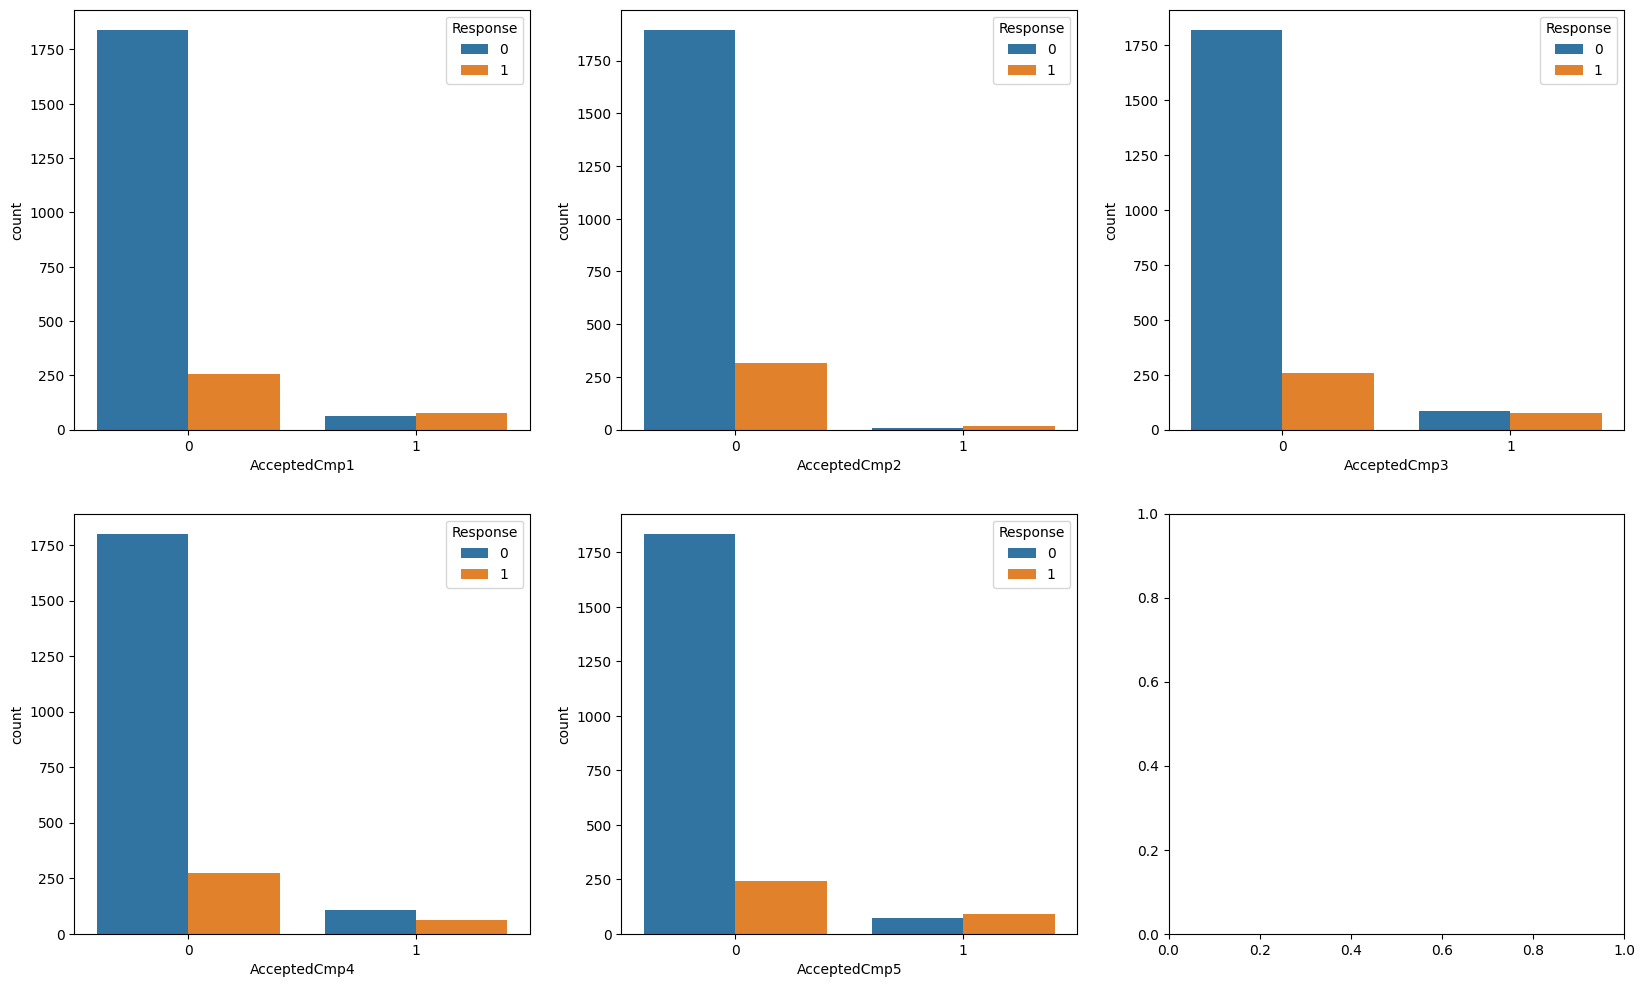

In [64]:
# eksplorasi orang orang yang menerima tawaran promo sebelum nya
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='AcceptedCmp1', hue='Response',data=df)
    sns.countplot(ax = axes[0,1], x='AcceptedCmp2', hue='Response',data=df)
    sns.countplot(ax = axes[0,2], x='AcceptedCmp3', hue='Response',data=df)
    sns.countplot(ax = axes[1,0], x='AcceptedCmp4', hue='Response',data=df)
    sns.countplot(ax = axes[1,1], x='AcceptedCmp5', hue='Response',data=df)
plot_categorical_data()

Dari grafik diatas saya menyimpulkan sebenearnya orang - orang yang dulunya tidak ikut campaign ini sebelumn - sebelumnya menjadi ikut bisa kita liat pada grafik yang nilai nya 0 itu tadinya tidak mengikuti tetapi pada campaign yang akan datang mereka ikut.

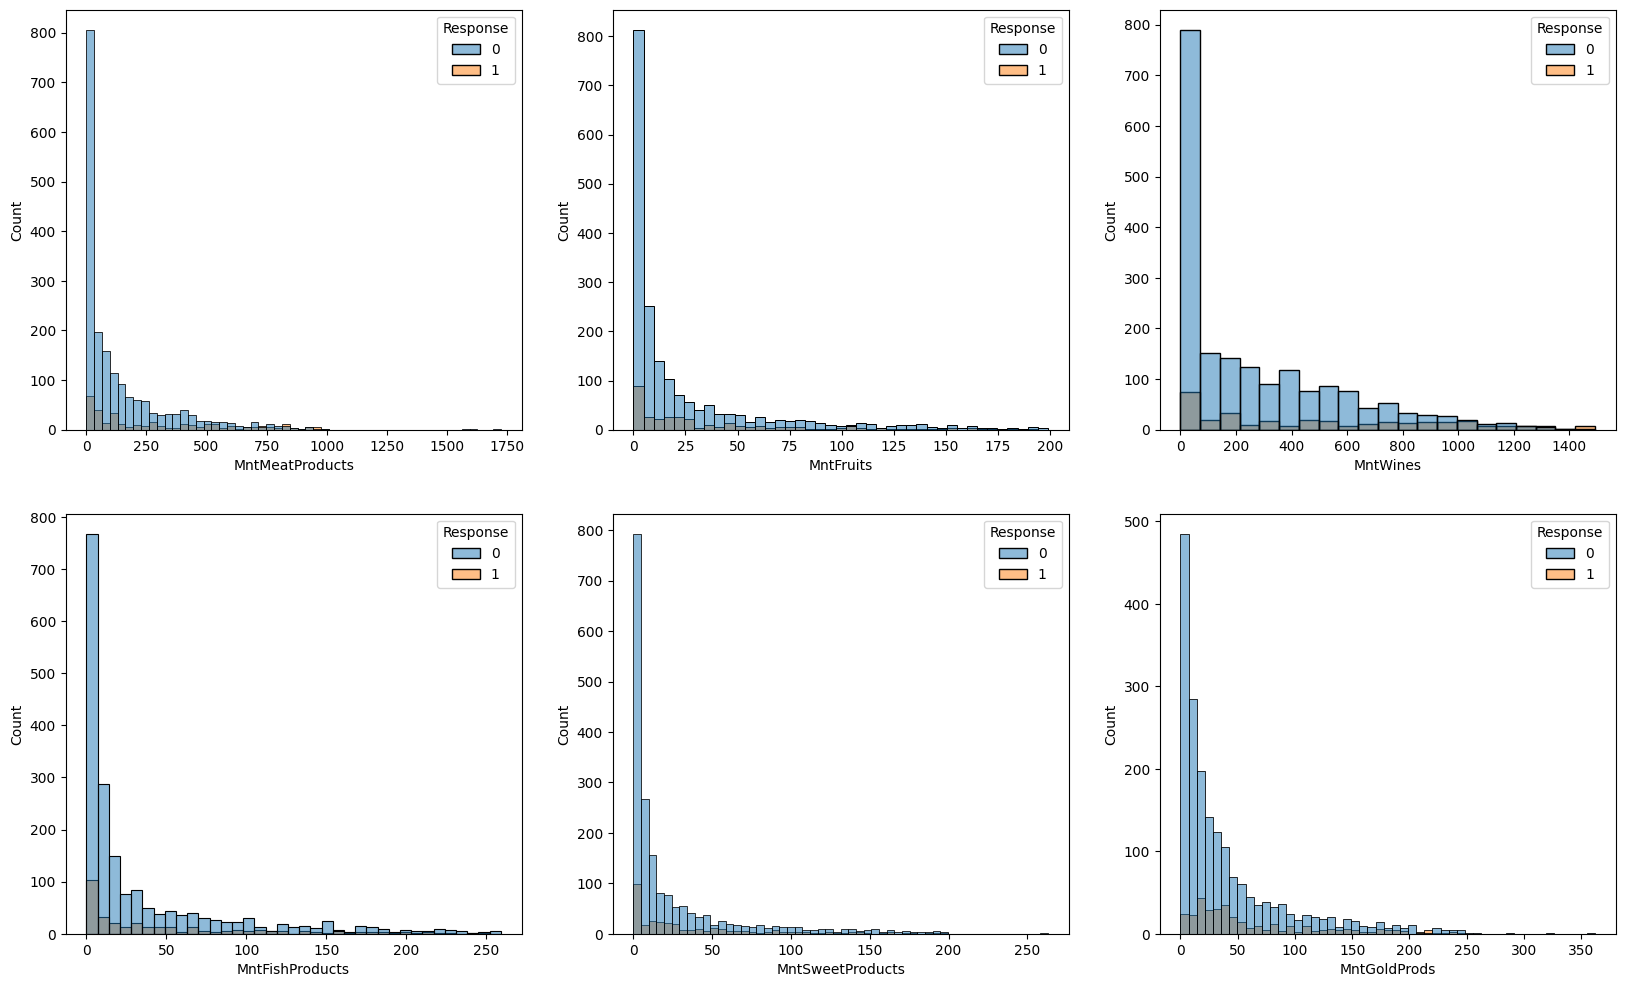

In [65]:
# Exploring numerical data
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.histplot(ax = axes[0,0], x='MntMeatProducts', hue='Response',data=df)
    sns.histplot(ax = axes[0,1], x='MntFruits', hue='Response',data=df)
    sns.histplot(ax = axes[0,2], x='MntWines', hue='Response',data=df)
    sns.histplot(ax = axes[1,0], x='MntFishProducts', hue='Response',data=df)
    sns.histplot(ax = axes[1,1], x='MntSweetProducts', hue='Response',data=df)
    sns.histplot(ax = axes[1,2], x='MntGoldProds',hue='Response',data=df)
plot_categorical_data()

In [66]:
df['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,   5,  16,  61,   2,
        14,  22,  80,  17,   3, 100,  12,  34,   8,  76,  11, 164,  18,
         6,  50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36,
       107, 111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,
        90,  48,  27,  33, 133,  58,  28,  21,  20, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154])

In [14]:
fig = px.histogram(df, x="Income", color="Response", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.write_html('Second_figure.html', auto_open=True)

In [ ]:
df.head(2)

<Axes: >

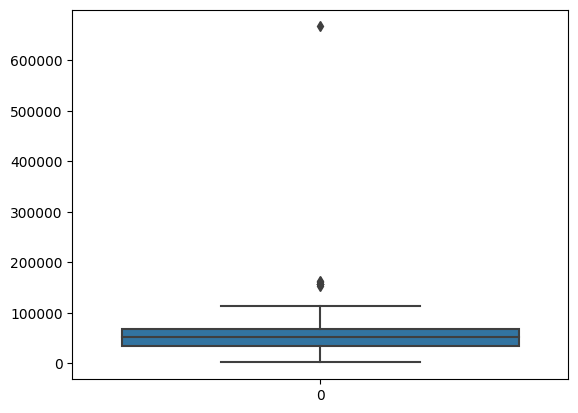

In [69]:
sns.boxplot(df['Income'])

Ada Outlier dan nilai target nya 0, maka saya hapus 

In [ ]:
gaji=df['Income'] >=1200000

In [7]:
df1 =df.copy()

In [8]:
penghasilan = df1[df1['Income'] >=120000]

In [9]:
penghasilan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,3,11,0,50
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,...,0,0,0,0,0,0,3,11,0,47
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,3,11,0,48
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,0,0,0,0,0,0,3,11,0,41
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,...,0,0,0,0,0,0,3,11,0,52
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,3,11,0,46
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,3,11,0,74
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,0,0,0,0,0,0,3,11,0,46


In [10]:
df1 = df1.drop(df1[df1['Income'] >= 120000].index, axis=0)

In [19]:
fig = px.box(df1, y="Income")
fig.write_html('first_figure.html', auto_open=True)

Sudah tidak ada lagi Outlier

In [14]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [11]:
null =df1[df1['Income'].isnull()]

In [21]:
null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,40
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,37
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,64
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,72
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,41
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,50
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,66
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,66
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,50
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,62


In [12]:
df1 = df1.drop(null[null['Response'] == 0].index, axis=0)

In [13]:
df1['Income'].isnull().sum()

1

karena ini bentuk nya numerik saya akan mengisi nya dengan modus

In [14]:
df1['Income'].fillna(df1['Income'].mode()[0], inplace=True)

In [35]:
df1['Income'].isnull().sum()

0

In [25]:
# Cek Missing Data
total_missing = df1.isnull().sum().sort_values(ascending=False)
percent_1 = df1.isnull().sum()/df1.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,ID,0,0.0
1,Year_Birth,0,0.0
2,Response,0,0.0
3,Z_Revenue,0,0.0
4,Z_CostContact,0,0.0
5,Complain,0,0.0
6,AcceptedCmp2,0,0.0
7,AcceptedCmp1,0,0.0
8,AcceptedCmp5,0,0.0
9,AcceptedCmp4,0,0.0


In [33]:
df1.shape

(2209, 30)

In [34]:
df.shape

(2240, 30)

Handling Oversampling Target

In [20]:
df1.to_csv('CustomerPersonality.csv')

In [35]:
df1['Response'].value_counts()

0    1875
1     334
Name: Response, dtype: int64

In [26]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df1[(df1['Response']==0)] 
df_minority = df1[(df1['Response']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1870, # to match majority class
                                 random_state=20)  # reproducible results
# Combine majority class with upsampled minority class
df_update = df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [40]:
df_update['Response'].value_counts()

0    1875
1    1870
Name: Response, dtype: int64

In [42]:
df_update.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [28]:
df_update.drop(columns=['ID','Dt_Customer'], inplace=True)
df_update.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1853,1961,Graduation,Together,64260.0,0,0,1,539,169,816,20,0,30,1,4,5,4,3,0,0,0,0,0,0,3,11,1,62
1570,1946,PhD,Single,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,77


ONE HOT ENCODING

In [29]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df_update['Education']= label_encoder.fit_transform(df_update['Education'])
df_update['Marital_Status']= label_encoder.fit_transform(df_update['Marital_Status'])

In [30]:
df_update.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
dtype: object

In [61]:
df_update.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1853,1961,2,5,64260.0,0,0,1,539,169,816,20,0,30,1,4,5,4,3,0,0,0,0,0,0,3,11,1,62
1570,1946,4,4,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,77
1533,1975,3,4,46098.0,1,1,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,1,48
2202,1973,4,7,48432.0,0,1,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,50
1881,1969,4,3,30396.0,1,0,22,15,0,6,0,1,12,2,1,1,2,7,1,0,0,0,0,0,3,11,1,54


In [32]:
X = df_update.loc[:, df_update.columns != 'Response']
y = df_update["Response"]

In [33]:
X.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Age                      int64
dtype: object

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

/home/bambang/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [37]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [39]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bambang/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [40]:
grid_search.best_score_

0.9025515253011589

In [41]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42)

### Evaluation

In [43]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

ACCURACY

In [44]:
from sklearn.metrics import accuracy_score
print("Accurracy with LR :", accuracy_score(y_test, y_lr))
print("Accurracy with RF :", accuracy_score(y_test, y_rf))

Accurracy with LR : 0.6989319092122831
Accurracy with RF : 0.9312416555407209


In [45]:
from sklearn.metrics import precision_score
print("Precision with LR :", precision_score(y_test, y_lr, average='macro'))
print("Precision with RF :", precision_score(y_test, y_rf, average='macro'))

Precision with LR : 0.7023958558169653
Precision with RF : 0.933669502872198


In [46]:
from sklearn.metrics import recall_score
print("Recall score with LR :", recall_score(y_test, y_lr, average='macro'))
print("Recall score with RF :", recall_score(y_test, y_rf, average='macro'))

Recall score with LR : 0.7008191674474635
Recall score with RF : 0.9300682639539553


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_rf))

[[546 177]
 [274 501]]
[[648  75]
 [ 28 747]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print("=======================================================")
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       723
           1       0.74      0.65      0.69       775

    accuracy                           0.70      1498
   macro avg       0.70      0.70      0.70      1498
weighted avg       0.70      0.70      0.70      1498

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       723
           1       0.91      0.96      0.94       775

    accuracy                           0.93      1498
   macro avg       0.93      0.93      0.93      1498
weighted avg       0.93      0.93      0.93      1498



In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7008191674474635
0.9300682639539554
